In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [86]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### Ordinary least squares (OLS) regression

$$
\beta_i = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}
$$

$$
\hat{\beta}_0 = \bar{y} - \beta_1 \bar{x}
$$

In [48]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

# mean of inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

# total number of values
n = len(X)

# calculating the coefficients b2 and b0
numerator = 0
dinominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    dinominator += (X[i] - x_mean) ** 2

b1 = numerator / dinominator
b0 = y_mean - (b1 * x_mean)

# printing the coefficient
print(f"b1: {b1}, b0: {b0}")

b1: 0.26342933948939945, b0: 325.57342104944223


$Brain\ weights =  325.57342104944223 + 0.26342933948939945\times Head\ size$


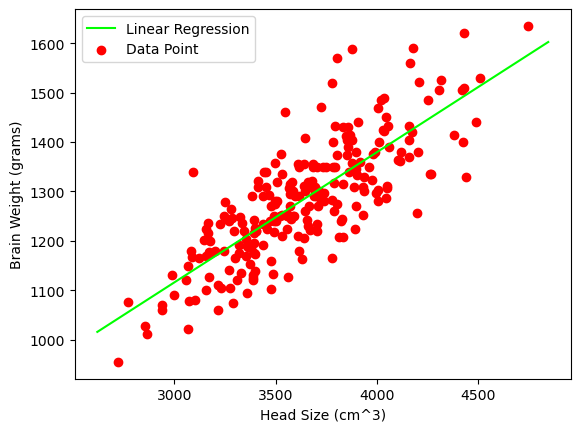

In [135]:
x_max = np.max(X) + 100
x_min = np.min(X) - 100

x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

# plotting the line
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data points
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('Head Size (cm^3)')
#y-axis label
plt.ylabel('Brain Weight (grams)')

plt.legend()
plt.show()

We need to able to measure how good our model is (accuracy). There are many methods to achieve this but we would implement _**Root mean squared error**_ and _**Coefficient of Determination (R² Score)**_.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{j=1}^{n} (\hat{y}_j - y_j)^2}
$$

In [190]:
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i] 
    rmse += (Y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/n)
print(f"RMSE: {rmse}")

RMSE: 72.1206213783709


Now, we will find $R^2$ score, defined as follows:

$$
SS_t = \sum_{i=1}^n (y_i - \bar{y})^2
$$

$$
SS_r = \sum_{i=1}^n (y_i - \hat{y_i})^2
$$

$$
R^2 = 1 - \frac {SS_r}{SS_t}
$$ 

$SS_t$ is the total sum of squares and $SS_r$ is the total sum of squares of residuals. \
$R^2$ Score usually range from 0 to 1. Now we will find $R^2$ score.

In [261]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - y_mean) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


0.63 is not so bad. Now we have implemented Simple Linear Regression Model using **Ordinary Least Square Method**.